# HW8 - Assignment 1 - vsg247

# Working with Data - Computer Lab for Guest Lecture Julia Lane

In this computer lab we will learn more more details and practice data work to enhance the content of the lecture presented by Julia Lane on responsible data use. We will address a research question, think about data and measurement errors, and manipulate data. 

OUTLINE: 
1. Define a research question 
2. Think about what data are available 
3. Think about possible measurement errors 
4. Think about the interpretation of your results 
5. Inform your results by linking datasets 

# 1. Define a reserach question
Which Community Districts in NYC show the highest number of complaints?

# 2. Think about what data are available
Find suitable data by searching the CUSP Data Catalog https://datahub.cusp.nyu.edu/catalog. You can use Urban Profiler to investigate the Metadata associated with each dataset. Using this tool will help you to decide which attributes of the data you need to answer your question so you don't have to load the entire dataset. 

In [1]:
import os
import pandas as pd
import numpy as np
import re
import pylab as pl
import statsmodels.formula.api as smf

PUIdata = 'http://cosmo.nyu.edu/~fb55/PUI2016/data/'
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load 311 data (selecting only columns of interest)
df311 = pd.read_csv('/projects/open/NYCOpenData/nycopendata/data/erm2-nwe9/1446832678/erm2-nwe9',
                    usecols = [0, 1, 3, 5, 6, 23, 24])

In [3]:
df311.head(3)

,Unique Key,Created Date,Agency,Complaint Type,Descriptor,Community Board,Borough
0,31911011,11/05/2015 02:59:15 AM,DOT,Street Condition,Pothole,13 BROOKLYN,BROOKLYN
1,31908754,11/05/2015 02:09:49 AM,CHALL,Opinion for the Mayor,HOUSING,0 Unspecified,Unspecified
2,31910423,11/05/2015 02:06:51 AM,DPR,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,18 BROOKLYN,BROOKLYN


In [4]:
df311.columns

Index([u'Unique Key', u'Created Date', u'Agency', u'Complaint Type',
       u'Descriptor', u'Community Board', u'Borough'],
      dtype='object')

In [5]:
# subsetting for testing purposes 
df311_test = df311.iloc[:10000, :]

In [6]:
# Load Community districts breakdown
ComDist = pd.read_csv('/projects/open/NYCOpenData/nycopendata/data/w3c6-35wg/1422440891/w3c6-35wg')

In [7]:
ComDist.head()

,JURISDICTION NAME,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER UNKNOWN,PERCENT GENDER UNKNOWN,COUNT GENDER TOTAL,PERCENT GENDER TOTAL,...,PERCENT CITIZEN STATUS UNKNOWN,COUNT CITIZEN STATUS TOTAL,PERCENT CITIZEN STATUS TOTAL,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE UNKNOWN,PERCENT PUBLIC ASSISTANCE UNKNOWN,COUNT PUBLIC ASSISTANCE TOTAL
0,Bronx CD 001,59,31,0.53,28,0.47,0,0,59,100,...,0,59,100,20,0.34,39,0.66,0,0,59
1,Bronx CD 002,7,5,0.71,2,0.29,0,0,7,100,...,0,7,100,3,0.43,4,0.57,0,0,7
2,Bronx CD 003,15,12,0.80,3,0.20,0,0,15,100,...,0,15,100,6,0.40,9,0.60,0,0,15
3,Bronx CD 004,44,27,0.61,17,0.39,0,0,44,100,...,0,44,100,13,0.30,31,0.70,0,0,44
4,Bronx CD 005,18,7,0.39,11,0.61,0,0,18,100,...,0,18,100,8,0.44,10,0.56,0,0,18


In [8]:
# checking how many Community Districts there are
ComDist['JURISDICTION NAME']

0         Bronx CD 001
1         Bronx CD 002
2         Bronx CD 003
3         Bronx CD 004
4         Bronx CD 005
5         Bronx CD 006
6         Bronx CD 007
7         Bronx CD 008
8         Bronx CD 009
9         Bronx CD 010
10        Bronx CD 011
11        Bronx CD 012
12     Brooklyn CD 001
13     Brooklyn CD 002
14     Brooklyn CD 003
15     Brooklyn CD 004
16     Brooklyn CD 005
17     Brooklyn CD 006
18     Brooklyn CD 007
19     Brooklyn CD 008
20     Brooklyn CD 009
21     Brooklyn CD 010
22     Brooklyn CD 011
23     Brooklyn CD 012
24     Brooklyn CD 013
25     Brooklyn CD 014
26     Brooklyn CD 015
27     Brooklyn CD 016
28     Brooklyn CD 017
29     Brooklyn CD 018
30    Manhattan CD 001
31    Manhattan CD 002
32    Manhattan CD 003
33    Manhattan CD 004
34    Manhattan CD 005
35    Manhattan CD 006
36    Manhattan CD 007
37    Manhattan CD 008
38    Manhattan CD 009
39    Manhattan CD 010
40    Manhattan CD 011
41    Manhattan CD 012
42       Queens CD 001
43       Qu

# 3. Think about possible measurement errors
Do you see any problems regarding possible measurement error? Think about who is represented in the data, ommissions, duplications, content error, missing data, etc. 

In [9]:
# Check if all Boroughs and Community Districts are represented in the Data
# How many unique values do we have? 

print len(df311['Community Board'].unique())
print df311['Community Board'].unique()
print df311['Borough'].unique()

77
['13 BROOKLYN' '0 Unspecified' '18 BROOKLYN' '12 BROOKLYN'
 '02 STATEN ISLAND' '08 MANHATTAN' '06 BROOKLYN' '10 BRONX' '06 MANHATTAN'
 '04 BROOKLYN' '04 QUEENS' '09 MANHATTAN' '14 BROOKLYN' '05 MANHATTAN'
 '02 MANHATTAN' '10 QUEENS' '07 QUEENS' '02 QUEENS' '11 BROOKLYN'
 '05 QUEENS' '05 BROOKLYN' '09 QUEENS' '12 MANHATTAN' '01 BROOKLYN'
 '11 MANHATTAN' '03 BRONX' '03 STATEN ISLAND' '08 BROOKLYN' '03 BROOKLYN'
 '07 MANHATTAN' '10 MANHATTAN' '04 BRONX' '01 MANHATTAN' '07 BRONX'
 '09 BRONX' '03 MANHATTAN' '13 QUEENS' '02 BRONX' '12 QUEENS' '16 BROOKLYN'
 '08 QUEENS' '04 MANHATTAN' '14 QUEENS' '10 BROOKLYN' '11 QUEENS'
 '06 BRONX' '08 BRONX' '05 BRONX' '15 BROOKLYN' '02 BROOKLYN' '12 BRONX'
 '03 QUEENS' '06 QUEENS' '01 STATEN ISLAND' '01 BRONX' '01 QUEENS'
 '17 BROOKLYN' '11 BRONX' 'Unspecified QUEENS' '09 BROOKLYN'
 'Unspecified MANHATTAN' 'Unspecified BROOKLYN' '07 BROOKLYN'
 'Unspecified BRONX' '64 MANHATTAN' '81 QUEENS' '55 BROOKLYN' '83 QUEENS'
 'Unspecified STATEN ISLAND' '28 BRON

There are 77 unique values for the Community Boards and 6 for the Boroughs.
As we checked previously on the ComDist data frame, there should be only 59 Community Districts and 5 Boroughs.
The reason we have so many is that some of them are "unspecified" or other types of invalid entries. So, lets get rid of those. 

In [10]:
invalid_entries = ['0 Unspecified', 'Unspecified QUEENS', 'Unspecified MANHATTAN',
                   'Unspecified BROOKLYN', 'Unspecified BRONX', 'Unspecified STATEN ISLAND',
                  '64 MANHATTAN', '81 QUEENS', '55 BROOKLYN', '83 QUEENS', '28 BRONX', '80 QUEENS',
                  '26 BRONX', '95 STATEN ISLAND']
print len(df311)

df311_clean = df311[~df311['Community Board'].isin(invalid_entries)]

print len(df311_clean)

10187766
8113247


In [11]:
print len(df311_clean['Community Board'].unique())
print df311_clean['Community Board'].unique()
print df311_clean['Borough'].unique()

63
['13 BROOKLYN' '18 BROOKLYN' '12 BROOKLYN' '02 STATEN ISLAND'
 '08 MANHATTAN' '06 BROOKLYN' '10 BRONX' '06 MANHATTAN' '04 BROOKLYN'
 '04 QUEENS' '09 MANHATTAN' '14 BROOKLYN' '05 MANHATTAN' '02 MANHATTAN'
 '10 QUEENS' '07 QUEENS' '02 QUEENS' '11 BROOKLYN' '05 QUEENS'
 '05 BROOKLYN' '09 QUEENS' '12 MANHATTAN' '01 BROOKLYN' '11 MANHATTAN'
 '03 BRONX' '03 STATEN ISLAND' '08 BROOKLYN' '03 BROOKLYN' '07 MANHATTAN'
 '10 MANHATTAN' '04 BRONX' '01 MANHATTAN' '07 BRONX' '09 BRONX'
 '03 MANHATTAN' '13 QUEENS' '02 BRONX' '12 QUEENS' '16 BROOKLYN'
 '08 QUEENS' '04 MANHATTAN' '14 QUEENS' '10 BROOKLYN' '11 QUEENS'
 '06 BRONX' '08 BRONX' '05 BRONX' '15 BROOKLYN' '02 BROOKLYN' '12 BRONX'
 '03 QUEENS' '06 QUEENS' '01 STATEN ISLAND' '01 BRONX' '01 QUEENS'
 '17 BROOKLYN' '11 BRONX' '09 BROOKLYN' '07 BROOKLYN' '82 QUEENS'
 '27 BRONX' '56 BROOKLYN' '84 QUEENS']
['BROOKLYN' 'STATEN ISLAND' 'MANHATTAN' 'BRONX' 'QUEENS']


In [12]:
# Check for duplicates? Are these plausible?
df311_clean.duplicated().sum()

22

Yes, the duplicates are plausible. It could have happened that someone called twice to complain or to follow up on a complain and the registry got duplicated on the database by mistake. It is good that there are not that many duplicates though. Nevertheless it i better to also get rid of them. 

In [13]:
print len(df311_clean)
df311_clean = df311_clean.drop_duplicates()
print len(df311_clean)

8113247
8113225


In [14]:
# What about missing values? Can you detect any patterns? 
df311_clean.isnull().sum()

Unique Key             0
Created Date           0
Agency                 0
Complaint Type         0
Descriptor         30551
Community Board        0
Borough                0
dtype: int64

Lots of Missing Values for the Descriptor.

In [15]:
# Data Editing: Is it possible to replace missing values? Is it possible to use Complaint Type 
# to fill missings in Resolution Descriptor?
df311_clean.head()

,Unique Key,Created Date,Agency,Complaint Type,Descriptor,Community Board,Borough
0,31911011,11/05/2015 02:59:15 AM,DOT,Street Condition,Pothole,13 BROOKLYN,BROOKLYN
2,31910423,11/05/2015 02:06:51 AM,DPR,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,18 BROOKLYN,BROOKLYN
3,31909924,11/05/2015 02:02:20 AM,NYPD,Illegal Parking,Blocked Hydrant,12 BROOKLYN,BROOKLYN
5,31914148,11/05/2015 01:55:55 AM,DOT,Highway Condition,Pothole - Highway,02 STATEN ISLAND,STATEN ISLAND
7,31912611,11/05/2015 01:47:12 AM,NYPD,Noise - Commercial,Loud Music/Party,08 MANHATTAN,MANHATTAN


It would be possible to replace the missing values of the Descriptor with the Complaint Type and get a somewhat more general information aboout the Descriptor. Nevertheless, since we won't use the Descriptor in our analysis we can simply drop that column. 

In [16]:
df311_clean = df311_clean.drop('Descriptor', axis = 1)
df311_clean.isnull().sum()

Unique Key         0
Created Date       0
Agency             0
Complaint Type     0
Community Board    0
Borough            0
dtype: int64

In [17]:
# Produce your result: Generate an indicator which ranks the Community District by complaint numbers 
# on the Community district level
DistCompl = df311_clean.groupby('Community Board').count().iloc[:, 0:1]
DistCompl.columns = ['N_Complaints']
DistCompl.head()

,N_Complaints
Community Board,
01 BRONX,74631
01 BROOKLYN,185057
01 MANHATTAN,77974
01 QUEENS,171484
01 STATEN ISLAND,182708


In [18]:
DistCompl = DistCompl.sort_values(by = 'N_Complaints', ascending = False)
DistCompl.head()

,N_Complaints
Community Board,
12 MANHATTAN,268053
12 QUEENS,229383
03 BROOKLYN,197305
07 QUEENS,195961
17 BROOKLYN,191720


In [19]:
# Save reduced data frame (Community District level)

# 4. Think about the interpretation of your results?
What do you have to keep in mind when interpreting your results? Are they generable? Does the way the data is collected influence your results? To better inform city agancies it might be good to explore in more detail the underlying dempgraphics/infrastructure of a Community District becasue this might influence 311 calls. You can do this by merging external data on the Community District level to your analysis data. 

In [20]:
# Population by Community District
df_pop = pd.read_csv(PUIdata + "/Final_Demographics.csv")

In [21]:
df_pop.shape

(59, 158)

In [22]:
# Check variables in file
df_pop.columns[:50]

Index([u'FIPS', u'cd_id', u'Total Population',
       u'Population Density (per sq. mile)', u'% Total Population: Male',
       u'% Total Population: 18 to 24 Years',
       u'% Total Population: 25 to 34 Years',
       u'% Total Population: 35 to 44 Years',
       u'% Population 5 Years And Over: Speak Only English',
       u'% Population 5 Years And Over: Spanish or Spanish Creole',
       u'% Population 5 Years And Over: Spanish or Spanish Creole: Speak English "very Well"',
       u'% Population 5 Years And Over: Spanish or Spanish Creole: Speak English Less Than "very Well"',
       u'Population 25 Years and over:',
       u'Population 25 Years and over: Less Than High School',
       u'Population 25 Years and over: High School Graduate (includes equivalency)',
       u'Population 25 Years and over: Some college',
       u'Population 25 Years and over: Bachelor's degree',
       u'Population 25 Years and over: Master's degree',
       u'Population 25 Years and over: Professional s

In [23]:
df_pop.columns[50:100]

Index([u'Population 3 Years and over Enrolled In School: Public School: K-8',
       u'Population 3 Years and over Enrolled In School: Public School: 9-12',
       u'Population 3 Years and over Enrolled In School: Public School: College',
       u'Population 3 Years and over Enrolled In School: Private School',
       u'Population 3 Years and over Enrolled In School: Private School: Pre-school',
       u'Population 3 Years and over Enrolled In School: Private School: K-8',
       u'Population 3 Years and over Enrolled In School: Private School: 9-12',
       u'Population 3 Years and over Enrolled In School: Private School: College',
       u'% Population 3 Years and over Enrolled In School: Public School',
       u'% Population 3 Years and over Enrolled In School: Public School: Pre-school',
       u'% Population 3 Years and over Enrolled In School: Public School: K-8',
       u'% Population 3 Years and over Enrolled In School: Public School: 9-12',
       u'% Population 3 Years and ov

In [24]:
df_pop.columns[100:]

Index([u'Employed Civilian Population 16 Years And Over: Unpaid Family Workers',
       u'% Employed Civilian Population 16 Years And Over: Private Sector',
       u'% Employed Civilian Population 16 Years And Over: Public Sector',
       u'% Employed Civilian Population 16 Years And Over: Self-Employed (incorporated and not incorporated)',
       u'% Employed Civilian Population 16 Years And Over: Private Non-Profit',
       u'% Employed Civilian Population 16 Years And Over: Unpaid Family Workers',
       u'Households:', u'Households: Less than $10,000',
       u'Households: $10,000 to $14,999', u'Households: $15,000 to $19,999',
       u'Households: $20,000 to $24,999', u'Households: $25,000 to $29,999',
       u'Households: $30,000 to $34,999', u'Households: $35,000 to $39,999',
       u'Households: $40,000 to $44,999', u'Households: $45,000 to $49,999',
       u'Households: $50,000 to $59,999', u'Households: $60,000 to $74,999',
       u'Households: $75,000 to $99,999', u'Househol

In [25]:
# How many community districts are in file? 
len(df_pop['cd_id'].unique())

59

In [26]:
# Manipulate data to get some information on demographics by Community District. 
# Think about who might be more likely to call 311
# Analysing income:
dfpop = df_pop[['cd_id', 'FIPS', 'Per capita income (In 2014 Inflation Adjusted Dollars)']]
dfpop.head()

,cd_id,FIPS,Per capita income (In 2014 Inflation Adjusted Dollars)
0,BX08,3603701,30730
1,BX12,3603702,21523
2,BX10,3603703,28586
3,BX11,3603704,22714
4,BX03,3603705,12662


In [27]:
df_pop['cd_id'].unique()

array(['BX08', 'BX12', 'BX10', 'BX11', 'BX03', 'BX06', 'BX07', 'BX05',
       'BX04', 'BX09', 'BX01', 'BX02', 'MN12', 'MN09', 'MN10', 'MN11111',
       'MN08', 'MN07', 'MN05', 'MN04', 'MN06', 'MN03', 'MN01', 'MN02',
       'SI03', 'SI02', 'SI01', 'BK01', 'BK04', 'BK03', 'BK02', 'BK06',
       'BK08', 'BK16', 'BK05', 'BK18', 'BK17', 'BK09', 'BK07', 'BK10',
       'BK12', 'BK14', 'BK15', 'BK11', 'BK13', 'QN01', 'QN03', 'QN07',
       'QN11', 'QN13', 'QN08', 'QN04', 'QN06', 'QN02', 'QN05', 'QN09',
       'QN12', 'QN10', 'QN14'], dtype=object)

In [28]:
# Infrastructure by Community District
df_infr = pd.read_csv(PUIdata + "/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")

In [29]:
# Check variables in file
df_infr.columns

Index([u'FIPS', u'Geographic Identifier', u'Qualifying Name', u'Households',
       u'Households: With An Internet Subscription',
       u'Households: Dial-Up Alone', u'Households: Dsl',
       u'Households: With Mobile Broadband',
       u'Households: Without Mobile Broadband', u'Households: Cable Modem',
       u'Households: With Mobile Broadband.1',
       u'Households: Without Mobile Broadband.1', u'Households: Fiber-Optic',
       u'Households: With Mobile Broadband.2',
       u'Households: Without Mobile Broadband.2',
       u'Households: Satellite Internet Service',
       u'Households: With Mobile Broadband.3',
       u'Households: Without Mobile Broadband.3',
       u'Households: Two or More Fixed Broadband Types, or Other',
       u'Households: With Mobile Broadband.4',
       u'Households: Without Mobile Broadband.4',
       u'Households: Mobile Broadband Alone or With Dialup',
       u'Households: Internet Access Without A Subscription',
       u'Households: No Internet Acc

In [30]:
# How many community districts are in file? 
len(df_infr['Qualifying Name'].unique())

55

In [31]:
# Manipulate data to get some information on internet/broadband usage by Community District
# Aggregate the mobile subscription data
df_infr.iloc[:5, 3:20]

,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,Households: With Mobile Broadband.1,Households: Without Mobile Broadband.1,Households: Fiber-Optic,Households: With Mobile Broadband.2,Households: Without Mobile Broadband.2,Households: Satellite Internet Service,Households: With Mobile Broadband.3,Households: Without Mobile Broadband.3,"Households: Two or More Fixed Broadband Types, or Other",Households: With Mobile Broadband.4
0,42035,31795,444,2813,946,1867,19178,10433,8745,939,433,506,75,37,38,6178,3510
1,44830,32243,178,849,405,444,18653,5577,13076,6216,2358,3858,131,0,131,5288,2146
2,47050,32729,158,1863,398,1465,20044,6377,13667,3490,1200,2290,0,0,0,6535,3450
3,44922,32003,141,1478,474,1004,17917,5624,12293,5435,2272,3163,308,241,67,5723,2137
4,57556,35503,88,1297,651,646,15847,6690,9157,1510,695,815,194,111,83,15182,6760


In [32]:
# Aggregate internet type by high and low connections
infra = df_infr[['Qualifying Name', 'FIPS','Households', 'Households: No Internet Access', 'Households: Internet Access Without A Subscription',
                'Households: With A Broadband Internet Subscription', 'Households: With Dial-Up Internet Subscription Alone' ]]
infra.head()

,Qualifying Name,FIPS,Households,Households: No Internet Access,Households: Internet Access Without A Subscription,Households: With A Broadband Internet Subscription,Households: With Dial-Up Internet Subscription Alone
0,"NYC-Bronx Community District 8--Riverdale, New...",3603701,42035,8121,2119,30943,404
1,"NYC-Bronx Community District 12--Wakefield, Ne...",3603702,44830,10696,1891,31435,178
2,"NYC-Bronx Community District 10--Co-op City, N...",3603703,47050,11439,2882,32333,158
3,NYC-Bronx Community District 11--Pelham Parkwa...,3603704,44922,10197,2722,31278,122
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",3603705,57556,18741,3312,33408,88


# 5. Inform your results by linking datasets
Now you want to link the three data frames to produce summary statistics for Community Districts which show a high number of complaints vs. Community Districts which show a lower number of complaints. Please keep in mind that the identifiers used for the linkage (Community Dostrict IDs) should be recored the same way. Use regular expressions to harmonize the identifiers if possible. The identifiers should look like BK01, BK02, etc.
https://docs.python.org/2/library/re.html

In [33]:
DistCompl['cd_id'] = DistCompl.index.copy()
# Harmonize identifier of dataframe 1
for i in range(len(DistCompl)):
    if 'BRONX'in DistCompl.index[i]:
        DistCompl['cd_id'][i] = 'BX' + str(DistCompl.index[i][0:2])
    elif 'MANHATTAN'in DistCompl.index[i]:
        DistCompl['cd_id'][i] = 'MN' + str(DistCompl.index[i][0:2])
    elif 'BROOKLYN'in DistCompl.index[i]:
        DistCompl['cd_id'][i] = 'BK' + str(DistCompl.index[i][0:2])
    elif 'QUEENS'in DistCompl.index[i]:
        DistCompl['cd_id'][i] = 'QN' + str(DistCompl.index[i][0:2])
    elif 'STATEN ISLAND'in DistCompl.index[i]:
        DistCompl['cd_id'][i] = 'SI' + str(DistCompl.index[i][0:2])
        

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-package

In [34]:
DistCompl['cd_id'].unique()

array(['MN12', 'QN12', 'BK03', 'QN07', 'BK17', 'BK05', 'BK14', 'BX07',
       'BK01', 'SI01', 'BX04', 'QN01', 'QN05', 'BX12', 'QN13', 'BX05',
       'BK18', 'MN07', 'QN09', 'BK12', 'MN03', 'MN08', 'BX09', 'BK15',
       'MN05', 'BK08', 'BK11', 'BK04', 'MN10', 'SI03', 'BK09', 'MN02',
       'MN04', 'QN10', 'MN09', 'QN08', 'BX11', 'QN03', 'SI02', 'BK02',
       'QN02', 'BK06', 'BK10', 'BK07', 'MN06', 'QN14', 'QN11', 'BX06',
       'QN04', 'BX10', 'MN11', 'BX08', 'QN06', 'BK16', 'MN01', 'BX03',
       'BX01', 'BK13', 'BX02', 'BK56', 'QN82', 'BX27', 'QN84'], dtype=object)

In [35]:
# Harmonize identifier of dataframe 2
dfpop['cd_id'].unique()

array(['BX08', 'BX12', 'BX10', 'BX11', 'BX03', 'BX06', 'BX07', 'BX05',
       'BX04', 'BX09', 'BX01', 'BX02', 'MN12', 'MN09', 'MN10', 'MN11111',
       'MN08', 'MN07', 'MN05', 'MN04', 'MN06', 'MN03', 'MN01', 'MN02',
       'SI03', 'SI02', 'SI01', 'BK01', 'BK04', 'BK03', 'BK02', 'BK06',
       'BK08', 'BK16', 'BK05', 'BK18', 'BK17', 'BK09', 'BK07', 'BK10',
       'BK12', 'BK14', 'BK15', 'BK11', 'BK13', 'QN01', 'QN03', 'QN07',
       'QN11', 'QN13', 'QN08', 'QN04', 'QN06', 'QN02', 'QN05', 'QN09',
       'QN12', 'QN10', 'QN14'], dtype=object)

In [36]:
# We have only to fix MN11111 to MN11
dfpop['cd_id'][15] = 'MN11'

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [37]:
dfpop['cd_id'].unique()

array(['BX08', 'BX12', 'BX10', 'BX11', 'BX03', 'BX06', 'BX07', 'BX05',
       'BX04', 'BX09', 'BX01', 'BX02', 'MN12', 'MN09', 'MN10', 'MN11',
       'MN08', 'MN07', 'MN05', 'MN04', 'MN06', 'MN03', 'MN01', 'MN02',
       'SI03', 'SI02', 'SI01', 'BK01', 'BK04', 'BK03', 'BK02', 'BK06',
       'BK08', 'BK16', 'BK05', 'BK18', 'BK17', 'BK09', 'BK07', 'BK10',
       'BK12', 'BK14', 'BK15', 'BK11', 'BK13', 'QN01', 'QN03', 'QN07',
       'QN11', 'QN13', 'QN08', 'QN04', 'QN06', 'QN02', 'QN05', 'QN09',
       'QN12', 'QN10', 'QN14'], dtype=object)

In [38]:
# Harmonize identifier of dataframe 3
infra.head()

,Qualifying Name,FIPS,Households,Households: No Internet Access,Households: Internet Access Without A Subscription,Households: With A Broadband Internet Subscription,Households: With Dial-Up Internet Subscription Alone
0,"NYC-Bronx Community District 8--Riverdale, New...",3603701,42035,8121,2119,30943,404
1,"NYC-Bronx Community District 12--Wakefield, Ne...",3603702,44830,10696,1891,31435,178
2,"NYC-Bronx Community District 10--Co-op City, N...",3603703,47050,11439,2882,32333,158
3,NYC-Bronx Community District 11--Pelham Parkwa...,3603704,44922,10197,2722,31278,122
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",3603705,57556,18741,3312,33408,88


In [39]:
len(infra['FIPS'].unique())

55

In [40]:
infra['FIPS'].unique()

array([3603701, 3603702, 3603703, 3603704, 3603705, 3603706, 3603707,
       3603708, 3603709, 3603710, 3603801, 3603802, 3603803, 3603804,
       3603805, 3603806, 3603807, 3603808, 3603809, 3603810, 3603901,
       3603902, 3603903, 3604001, 3604002, 3604003, 3604004, 3604005,
       3604006, 3604007, 3604008, 3604009, 3604010, 3604011, 3604012,
       3604013, 3604014, 3604015, 3604016, 3604017, 3604018, 3604101,
       3604102, 3604103, 3604104, 3604105, 3604106, 3604107, 3604108,
       3604109, 3604110, 3604111, 3604112, 3604113, 3604114])

In [41]:
len(dfpop['FIPS'].unique())

55

In [42]:
dfpop['FIPS'].unique()

array([3603701, 3603702, 3603703, 3603704, 3603705, 3603706, 3603707,
       3603708, 3603709, 3603710, 3603801, 3603802, 3603803, 3603804,
       3603805, 3603806, 3603807, 3603808, 3603809, 3603810, 3603901,
       3603902, 3603903, 3604001, 3604002, 3604003, 3604004, 3604005,
       3604006, 3604007, 3604008, 3604009, 3604010, 3604011, 3604012,
       3604013, 3604014, 3604015, 3604016, 3604017, 3604018, 3604101,
       3604102, 3604103, 3604104, 3604105, 3604106, 3604107, 3604108,
       3604109, 3604110, 3604111, 3604112, 3604113, 3604114])

In [43]:
# Link the 3 dataframes
merged = pd.merge(dfpop, infra, on='FIPS')
merged.head()

,cd_id,FIPS,Per capita income (In 2014 Inflation Adjusted Dollars),Qualifying Name,Households,Households: No Internet Access,Households: Internet Access Without A Subscription,Households: With A Broadband Internet Subscription,Households: With Dial-Up Internet Subscription Alone
0,BX08,3603701,30730,"NYC-Bronx Community District 8--Riverdale, New...",42035,8121,2119,30943,404
1,BX12,3603702,21523,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,10696,1891,31435,178
2,BX10,3603703,28586,"NYC-Bronx Community District 10--Co-op City, N...",47050,11439,2882,32333,158
3,BX11,3603704,22714,NYC-Bronx Community District 11--Pelham Parkwa...,44922,10197,2722,31278,122
4,BX03,3603705,12662,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,18741,3312,33408,88


In [44]:
merged = pd.merge(DistCompl, merged, on='cd_id')
merged.head()

,N_Complaints,cd_id,FIPS,Per capita income (In 2014 Inflation Adjusted Dollars),Qualifying Name,Households,Households: No Internet Access,Households: Internet Access Without A Subscription,Households: With A Broadband Internet Subscription,Households: With Dial-Up Internet Subscription Alone
0,268053,MN12,3603801,21969,NYC-Manhattan Community District 12--Washingto...,75352,16275,2137,56092,306
1,229383,QN12,3604112,21748,"NYC-Queens Community District 12--Jamaica, New...",74848,19463,1537,53106,514
2,197305,BK03,3604003,21424,NYC-Brooklyn Community District 3--Bedford-Stu...,50688,15567,1683,32660,110
3,195961,QN07,3604103,25870,"NYC-Queens Community District 7--Flushing, New...",89206,19514,1246,67680,150
4,191720,BK17,3604010,23300,NYC-Brooklyn Community District 17--East Flatb...,50711,13852,1184,34990,256


In [45]:
merged = merged.drop(['FIPS', 'Qualifying Name'], axis = 1)
merged.head()

,N_Complaints,cd_id,Per capita income (In 2014 Inflation Adjusted Dollars),Households,Households: No Internet Access,Households: Internet Access Without A Subscription,Households: With A Broadband Internet Subscription,Households: With Dial-Up Internet Subscription Alone
0,268053,MN12,21969,75352,16275,2137,56092,306
1,229383,QN12,21748,74848,19463,1537,53106,514
2,197305,BK03,21424,50688,15567,1683,32660,110
3,195961,QN07,25870,89206,19514,1246,67680,150
4,191720,BK17,23300,50711,13852,1184,34990,256


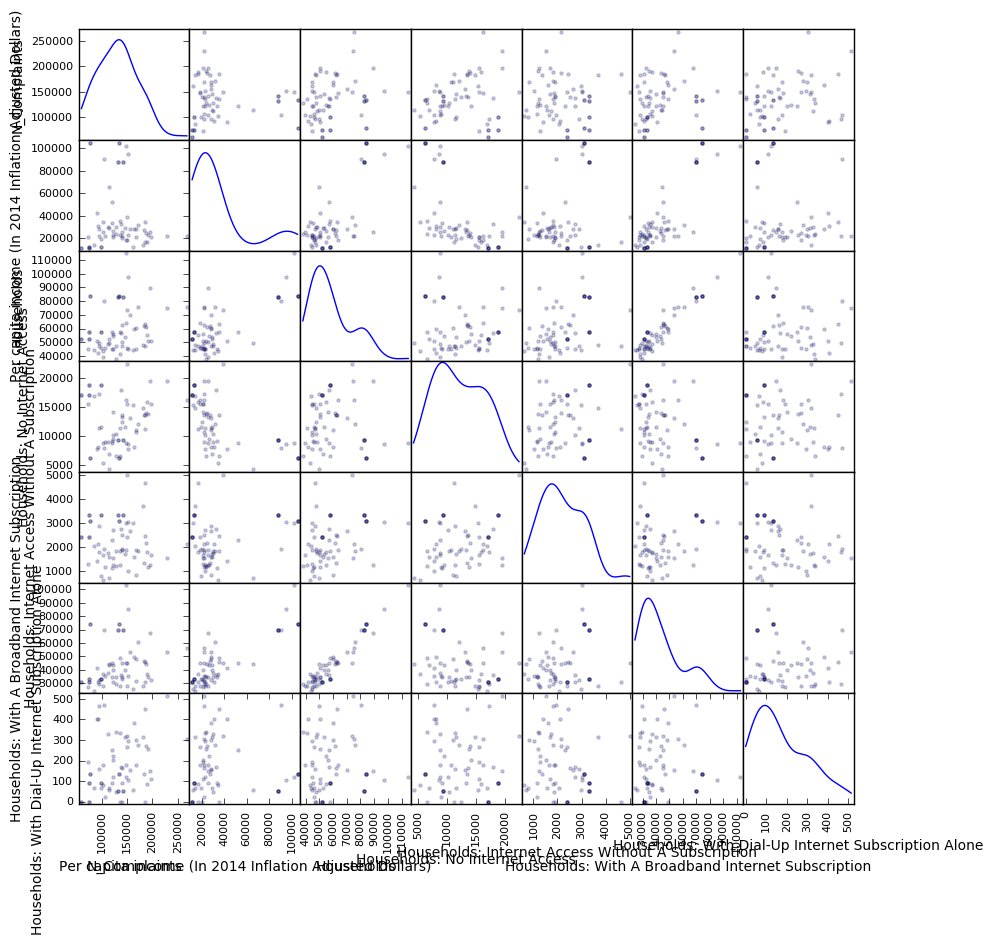

In [46]:
# Are the demographics and infrastructure different in Community Districts that show more complaints than others?
pd.scatter_matrix(merged, alpha=0.2, figsize=(10, 10), diagonal='kde')
pl.show()

From the scatter matrix we can already see that the number of households with Broadband is strongly correlated with the Income per Capita on each District. With the number of complains, though, it is not very clear whether or not those two variables are correlated.  

In [47]:
merged.corr()

,N_Complaints,Per capita income (In 2014 Inflation Adjusted Dollars),Households,Households: No Internet Access,Households: Internet Access Without A Subscription,Households: With A Broadband Internet Subscription,Households: With Dial-Up Internet Subscription Alone
N_Complaints,1.000000,-0.056520,0.235760,0.119104,-0.045165,0.203950,0.314947
Per capita income (In 2014 Inflation Adjusted Dollars),-0.056520,1.000000,0.753915,-0.586929,0.296664,0.864686,-0.045238
Households,0.235760,0.753915,1.000000,-0.086621,0.406709,0.955924,-0.008618
Households: No Internet Access,0.119104,-0.586929,-0.086621,1.000000,0.250990,-0.370114,0.009390
Households: Internet Access Without A Subscription,-0.045165,0.296664,0.406709,0.250990,1.000000,0.262156,-0.219164
Households: With A Broadband Internet Subscription,0.203950,0.864686,0.955924,-0.370114,0.262156,1.000000,0.002095
Households: With Dial-Up Internet Subscription Alone,0.314947,-0.045238,-0.008618,0.009390,-0.219164,0.002095,1.000000


Looking at the matrix of Pearson's correlation coeficients, none of the variables considered for the analysis seems to be strogly correlated with the number of complaints. 